# SIMPLE LINEAR REGRESSION

In [17]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Generate random data
random.seed(42)  # Set a seed for reproducibility
num_samples = 100  # Number of data points

study_time = [random.uniform(1, 10) for _ in range(num_samples)]
score = [study * 5 + random.uniform(-5, 5) for study in study_time]

# Create a DataFrame
df = pd.DataFrame({'Study_Time': study_time, 'Score': score})

# Display the DataFrame as a table
display(df.head())


,Study_Time,Score
0,6.754841,28.889016
1,1.225097,8.332702
2,3.475264,19.193423
3,3.008897,15.414187
4,7.628241,35.809457


In [6]:
df.describe()

,Study_Time,Score
count,100.000000,100.000000
mean,5.316123,26.469402
std,2.655035,13.629794
min,1.058489,1.820837
25%,3.040538,14.971446
50%,5.338932,25.600803
75%,7.396395,37.038249
max,9.977838,53.691352


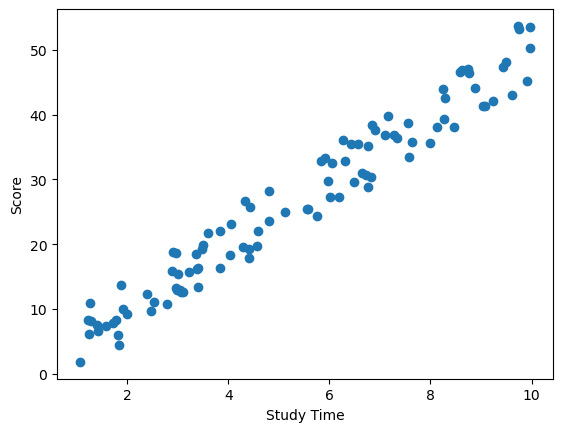

In [7]:
plt.scatter(df.Study_Time , df.Score)
plt.xlabel ('Study Time')
plt.ylabel('Score')
plt.show()


**Choosing your X and y values**

In [8]:
y= df.Score
X= df.Study_Time

**Splitting Data into Training and Testing**

In [9]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 10)
print("Training: ", train_X.shape, train_y.shape)
print("Testing: ", test_X.shape, test_y.shape)

Training:  (80,) (80,)
Testing:  (20,) (20,)


**Creating Linear Regression Model**

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
#Create a linear regression model
model = LinearRegression()
model

LinearRegression()

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming train_X and train_y are pandas Series ---this is only necessary when working with numpy series.
train_X = train_X.to_numpy().reshape(-1, 1)  # Convert to NumPy array and reshape
train_y = train_y.to_numpy().reshape(-1, 1)  # Convert to NumPy array and reshape
test_X = test_X.to_numpy().reshape(-1, 1)  # Convert to NumPy array and reshape  
test_y = test_y.to_numpy().reshape(-1, 1)  # Convert to NumPy array and reshape


# Create a LinearRegression model
model = LinearRegression()

# Fit the model
model.fit(train_X, train_y)


LinearRegression()

In [13]:
# Predict on the testing set
# y_preds are the predicted values of target variable based on features
# We compare the predicted values to actual values to evaluate performance of the model


y_preds = model.predict(test_X)
y_preds.shape

(20, 1)

**Evaluating Performance of the Model**

In [15]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(test_y, y_preds)
mse = mean_squared_error(test_y, y_preds)
mae = mean_absolute_error(test_y, y_preds)
intercept = model.intercept_

print("R2 score: ", r2)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Intercept: ", intercept)

R2 score:  0.9617443244055885
Mean Squared Error:  8.002774248222135
Mean Absolute Error:  2.478771519806216
Intercept:  [-0.10876597]


**Explanation** 

R2_score:
The R2 score measures the proportion of the variance in the dependent variable. A higher R2 score indicates a better fit
An R2 score of 0.9617 is very high, which suggests that your model explains approximately 96.17% .

Mean_Squared_Error:
measures the average squared difference between the actual and predicted values. A lower MSE is better.8.002 is relatively low.

Mean_Absolute_Error:
measures the average absolute difference between the actual and predicted values. lower MAE is better. 2.47 is very low.

Intercept:
represents predicted score when study time is zero. Study_Time is zero may not have a meaningful real-world interpretation.
 

**Plotting Predicted vs Actual values**

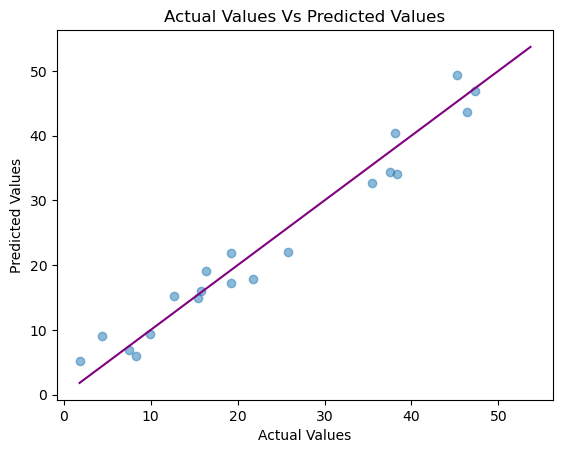

In [61]:
# Predicted values are plotted on the y-axis while Actual Values are plotted on x- axis

plt.scatter(test_y, y_preds, alpha = 0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color = "purple")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values Vs Predicted Values')
plt.show()

**Residual Plot**

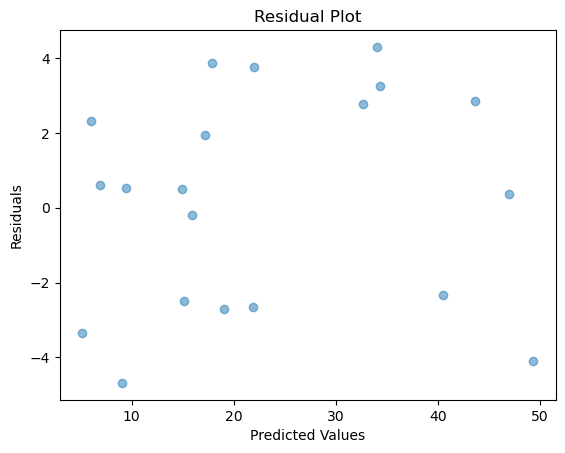

In [62]:
#Residuals are plotted against predicted values
#If the linear is a good fit the residuals should show random scatter of points around zero.

plt.scatter(y_preds, test_y - y_preds , alpha = 0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()